# Example Regridding

## 0. Download file from https://data.eumetsat.int/search?query= 

Use CDO (https://code.mpimet.mpg.de/projects/cdo/) to rename variales lat to latitude and lon to longitude.

## Prepare data from Eumetsat
### open bash terminal 
```bash
sudo apt-get install cdo
ncdump -h filename.nc # displays variables 
cdo chname,lat,latitude,lon,longitude W_XX-EUMETSAT-Darmstadt,SING+LEV+SAT,MSG2+CLM_C_EUMG_20121001120000.nc W_XX-EUMETSAT-Darmstadt,SING+LEV+SAT,MSG2+CLM_C_EUMG_20121001120000_new_coords.nc
```

24 files is 24 hours of data and its size in the different fileformats are respectively
* NetCDF - 3840 Mb
* GRB - 168 Mb

## 1. Read NC-file and remove redundant categories (land and ocean without cloud cover)
Download a file in netcdf-format to retrieve the coordinate information. Additional files was downloaded in .grb format to save space. Removing the four categories present in the file. 

In [1]:
import glob 
import xarray as xr

nc_fil = glob.glob('../ECC_DATA/Examples/W_XX-EUMETSAT-Darmstadt,SING+LEV+SAT,MSG2+CLM_C_EUMG_20121001120000_new_coords.nc')[0]
cloudMask = xr.open_dataset(nc_fil)

In [2]:
cloudMask.keys()

KeysView(<xarray.Dataset>
Dimensions:    (x: 3712, y: 3712)
Dimensions without coordinates: x, y
Data variables:
    cloudMask  (y, x) float32 ...
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
Attributes: (12/23)
    CDI:                             Climate Data Interface version ?? (http:...
    Conventions:                     CF-1.0
    history:                         Sun Jan 09 10:43:10 2022: cdo chname,lat...
    source:                          /data/products/4752568/MSG2-SEVI-MSGCLMK...
    institution:                     EUMETSAT
    creator_name:                    EUMETSAT
    ...                              ...
    GRIB_orgReferenceTime:           20121001120000
    latitude_of_projection_origin:   0.0
    longitude_of_projection_origin:  0.0
    time_coverage_start:             20121001120000
    time_coverage_end:               20121001120000
    CDO:                             Climate Data Operators version 1.7.0 (ht...)

## Categories 
* 0 - ocean
* 1 - land
* 2 - cloud 
* NaN (.nc)- of earth disk 
* 3 (.grb) - off earth disk

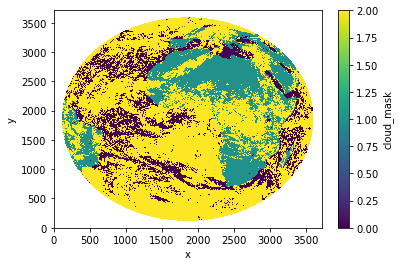

In [3]:
cloudMask.cloudMask.plot()

## Loading packages 

In [4]:
import json
import glob

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns 

from calc_fractional_cover import calc_fraction_one_cell, clean_file, save_dir, area_grid_cell, compute

In [5]:
compute?

Signature: compute(satfil, lats=None, lons=None)
Docstring:
Function for computing the cloudfractions for lists of latitudes and longitudes.

Parameters 
    satfil (str) : filename
    lats List[str]: list of latitude values  
    lons List[str]: list of longitudinal values
    
Returns
    fractions (pd.DataFrame) : pandas dataframe of the fractions 
    pair (List[Tuple[str, str]
File:      ~/european-cloud-cover/calc_fractional_cover.py
Type:      function


In [6]:
latitude = np.arange(-15, 25.25, 0.25)
longitude = np.arange(30, 50.25, 0.25)

## 2. Regrid test .nc-file to ECC

In [8]:
nc_df, _ = compute(nc_fil, lats = latitude, lons = longitude)

In [9]:
nc_df

,-15.0,-14.75,-14.5,-14.25,-14.0,-13.75,-13.5,-13.25,-13.0,-12.75,...,22.75,23.0,23.25,23.5,23.75,24.0,24.25,24.5,24.75,25.0
30.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.940241,0.938532,0.014062,0.215594,0.012439,0.057943,0.219359,0.661866,0.512046
30.25,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.902870,0.896899,0.828583,0.109463,0.309445,0.565230,0.132812,0.874401,0.405243,0.735673
30.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.993926,1.000000,0.964702,0.153578,0.367798,0.681497,0.638034,0.798379,0.076038,0.723844
30.75,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.383630,0.697275,0.639447,0.690172,0.926597,1.000000,1.000000,0.900441,0.497829,0.216935
31.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.137423,0.372191,0.176719,0.328049,0.878664,1.000000,1.000000,0.992878,0.456995,0.170332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.970190,0.821295,0.955958,1.000000,1.000000,0.957898,0.843454,1.000000,1.000000,1.000000
49.25,0.885981,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,0.991341,0.886062,0.956239,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
49.5,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.908018,0.727473,0.946915,0.904404,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
49.75,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Regrid test .grb-file to ECC

In [10]:
grb_fil = glob.glob('../ECC_DATA/Examples/*.grb')[0]
grb_fil

'../ECC_DATA/Examples/MSG2-SEVI-MSGCLMK-0100-0100-20121001120000.000000000Z-20121001121257-4752566.grb'

In [11]:
GRB_cloudMask = xr.open_dataset(grb_fil, engine = 'cfgrib')
GRB_cloudMask

ecCodes provides no latitudes/longitudes for gridType='space_view'


<xarray.Dataset>
Dimensions:  (values: 13778944)
Coordinates:
    time     datetime64[ns] ...
Dimensions without coordinates: values
Data variables:
    p260537  (values) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             eums
    GRIB_centreDescription:  EUMETSAT Operation Centre
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             EUMETSAT Operation Centre
    history:                 2023-03-28T20:32:08 GRIB to CDM+CF via cfgrib-0....

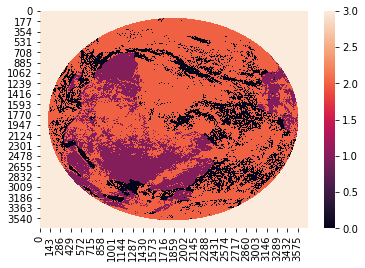

In [12]:
sns.heatmap(GRB_cloudMask['p260537'].values.reshape(3712, 3712))

In [13]:
grb_df, _ = compute(satfil=grb_fil, lats=latitude, lons=longitude)

ecCodes provides no latitudes/longitudes for gridType='space_view'


In [14]:
grb_df

,-15.0,-14.75,-14.5,-14.25,-14.0,-13.75,-13.5,-13.25,-13.0,-12.75,...,22.75,23.0,23.25,23.5,23.75,24.0,24.25,24.5,24.75,25.0
30.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.940241,0.938532,0.014062,0.215594,0.012439,0.057943,0.219359,0.661866,0.512046
30.25,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.902870,0.896899,0.828583,0.109463,0.309445,0.565230,0.132812,0.874401,0.405243,0.735673
30.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.993926,1.000000,0.964702,0.153578,0.367798,0.681497,0.638034,0.798379,0.076038,0.723844
30.75,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.383630,0.697275,0.639447,0.690172,0.926597,1.000000,1.000000,0.900441,0.497829,0.216935
31.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.137423,0.372191,0.176719,0.328049,0.878664,1.000000,1.000000,0.992878,0.456995,0.170332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.970190,0.821295,0.955958,1.000000,1.000000,0.957898,0.843454,1.000000,1.000000,1.000000
49.25,0.885981,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,0.991341,0.886062,0.956239,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
49.5,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.908018,0.727473,0.946915,0.904404,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
49.75,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Comparing the regridded data
Summarzing the difference between the dataframes. Showing that they are identical.

In [15]:
(nc_df-grb_df).sum().sum()

0.0

Text(0.5, 1.0, 'Regridding .nc-file')

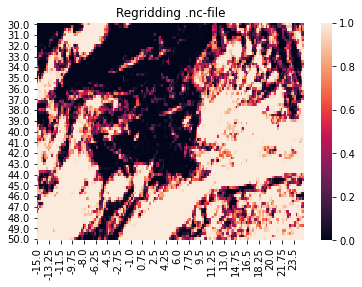

In [16]:
ax = sns.heatmap(grb_df)
ax.set_title('Regridding .nc-file')

Text(0.5, 1.0, 'Regridding .grb-file')

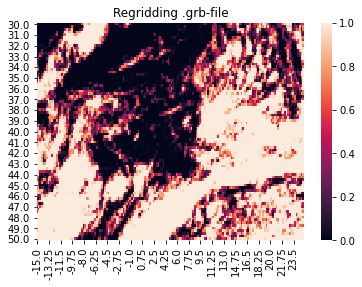

In [17]:
ax = sns.heatmap(grb_df)
ax.set_title('Regridding .grb-file')